In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Perlin Noise

## Functions

In [2]:
def plot_matrices(matrices, title_prefix, cmap="viridis"):
    """Plot multiple matrices side by side."""
    num_matrices = len(matrices)
    fig, axes = plt.subplots(1, num_matrices, figsize=(num_matrices * 5, 5))

    for i, matrix in enumerate(matrices):
        ax = axes[i]
        sns.heatmap(matrix, cmap=cmap, cbar=True, square=True, xticklabels=False, yticklabels=False, ax=ax)
        ax.set_title(f"{title_prefix} {i+1}")

    plt.tight_layout()
    plt.show()

In [3]:
def plot_matrix(matrix, title="Matrix", cmap="viridis"):
    """Plot a single matrix as heatmap."""
    plt.figure(figsize=(5, 5))
    sns.heatmap(matrix, cmap=cmap, cbar=True, square=True, xticklabels=False, yticklabels=False)
    plt.title(title)
    plt.show()

In [4]:
def plot_3d_surface(height_map):
    """Plot the height map as a 3D surface."""
    x = np.arange(0, height_map.shape[1])
    y = np.arange(0, height_map.shape[0])
    x, y = np.meshgrid(x, y)

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(x, y, height_map, cmap='terrain', linewidth=0, antialiased=True)
    ax.set_zlim(-0.5, 1.5)
    ax.view_init(elev=45, azim=60)
    plt.title("3D Surface Plot of Procedural Noise Map")
    plt.colorbar(surf, shrink=0.5, aspect=10)
    plt.show()

In [27]:
def normalize(v):
    norm = math.hypot(v[0], v[1])
    if norm == 0:
        return (0, 0)
    return (v[0] / norm, v[1] / norm)


def fade(t):
    """Smooth fading function for interpolation."""
    return t * t * t * (t * (t * 6 - 15) + 10)


def lerp(t, a, b):
    """Linear interpolation."""
    return a + t * (b - a)


def grad(hash, x, y):
    h = hash & 11  # 4 bit → 16 possible values
    g = gradients_16[h]
    return x * g[0] + y * g[1]


def perlin(x, y):
    """Compute 2D Perlin noise at position (x, y)."""
    X = int(np.floor(x)) & 255
    Y = int(np.floor(y)) & 255

    aa = permutation[permutation[X] + Y]
    ab = permutation[permutation[X] + Y + 1]
    ba = permutation[permutation[X + 1] + Y]
    bb = permutation[permutation[X + 1] + Y + 1]

    x -= np.floor(x)
    y -= np.floor(y)

    u = fade(x)
    v = fade(y)

    x1 = lerp(u, grad(aa, x, y), grad(ba, x - 1, y))
    x2 = lerp(u, grad(ab, x, y - 1), grad(bb, x - 1, y - 1))

    return lerp(v, x1, x2)


def generate_perlin_noise(width=256, height=256, scale=50.0):
    """Generate a 2D array of Perlin noise."""
    noise_map = np.zeros((height, width))
    for y in range(height):
        for x in range(width):
            # Normalize the coordinates between 0 and 1,
            # indipendent from the size of the image
            nx = x / width
            ny = y / height
            value = perlin(nx * scale, ny * scale)
            noise_map[y][x] = (value + 1) / 2  # Normalize from [-1,1] to [0,1]
    return noise_map

## Method Execution

In [ ]:
# Hashing permutation table
permutation = list(range(256))
np.random.shuffle(permutation)
permutation = permutation * 2  # Extend to allow easier wrapping

gradients_16 = [
    (math.cos(theta), math.sin(theta))
    for theta in [2 * math.pi * i / 16 for i in range(16)]
]

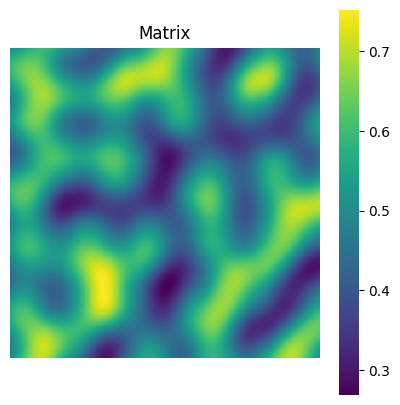

Final: Resulting Procedural Noise Map


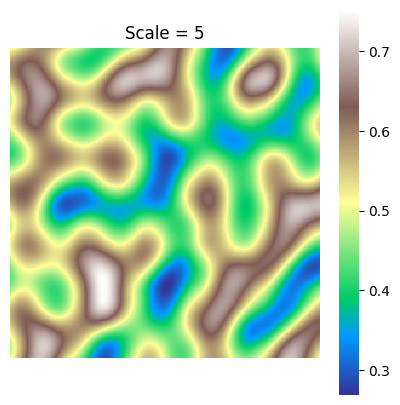

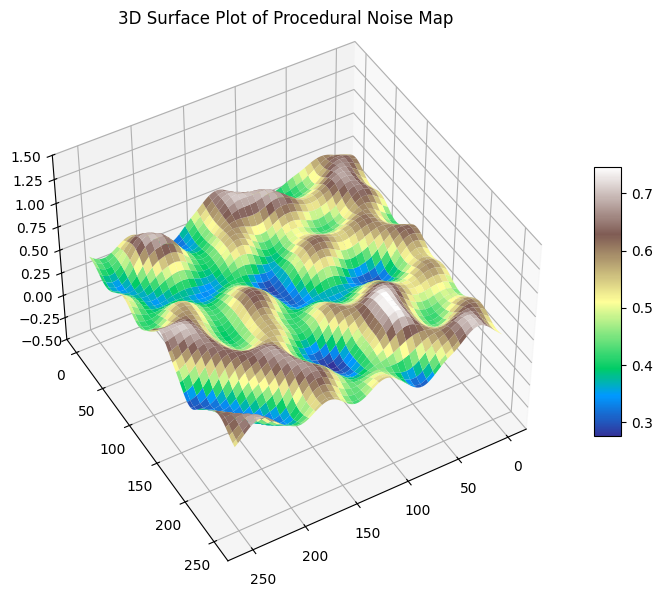

In [29]:
# Generate the noise map
noise_map = generate_perlin_noise(scale=5.0)

plot_matrix(noise_map)

# Final Result
print("Final: Resulting Procedural Noise Map")
plot_matrix(noise_map, "Scale = 5", cmap="terrain")
plot_3d_surface(noise_map)

## Some Plots for Presentation/Report

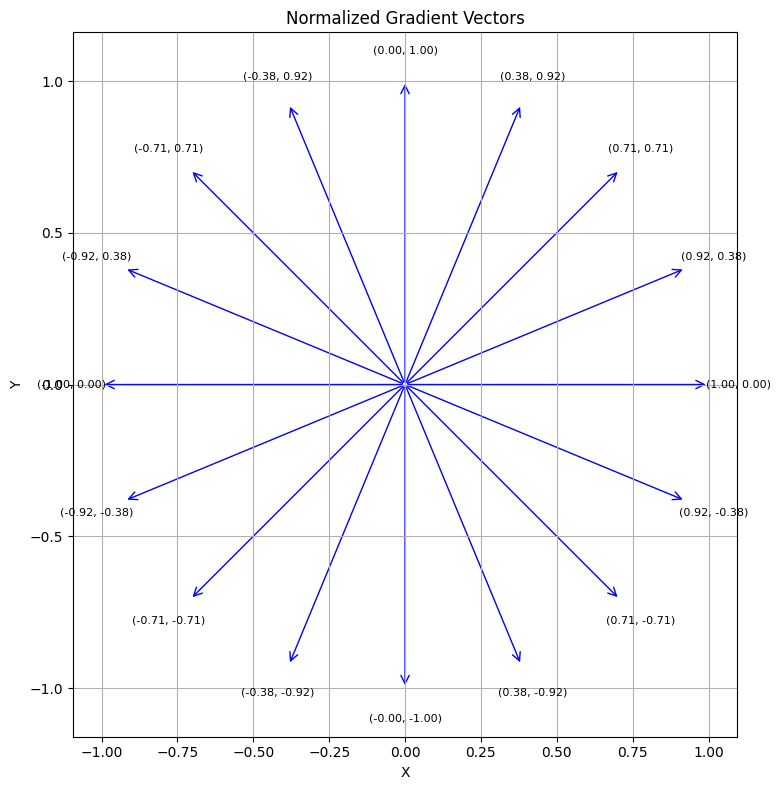

In [26]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from math import sqrt

# Create the plot
fig, ax = plt.subplots(figsize=(8, 8))

# Draw arrows and labels
for idx, (x, y) in enumerate(gradients_16):
    # Create an arrow from (0,0) to (x,y)
    arrow = patches.FancyArrowPatch((0, 0), (x, y),
                                    mutation_scale=15,
                                    arrowstyle='->',
                                    color='blue')
    ax.add_patch(arrow)

    # Add label near the arrow tip
    ax.text(x * 1.1, y * 1.1, f'({x:.2f}, {y:.2f})', fontsize=8, ha='center', va='center')

# Set plot limits and appearance
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.grid(True)
ax.set_title("Normalized Gradient Vectors")
ax.set_xlabel("X")
ax.set_ylabel("Y")
plt.axis('equal')
plt.tight_layout()
plt.show()

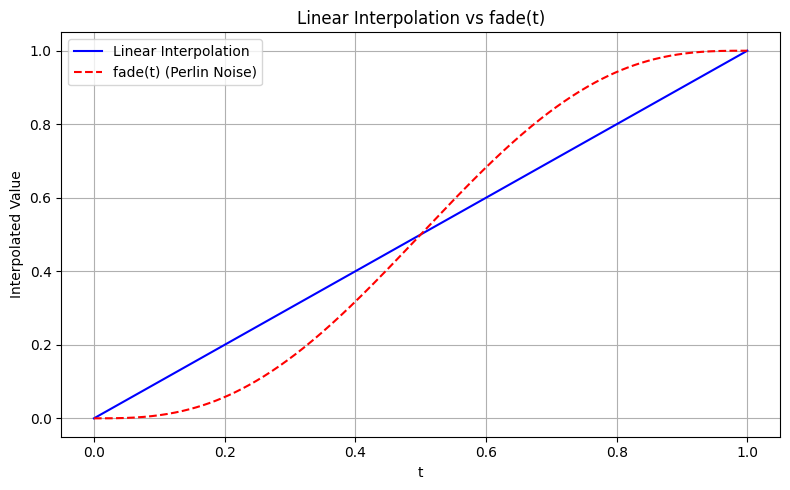

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Definiamo le due funzioni
def linear(t):
    return t

def fade(t):
    return t * t * t * (t * (t * 6 - 15) + 10)

# Generiamo valori tra 0 e 1
t = np.linspace(0, 1, 500)

# Calcoliamo i valori delle funzioni
y_linear = linear(t)
y_fade = fade(t)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(t, y_linear, label="Linear Interpolation", color='blue')
plt.plot(t, y_fade, label="fade(t) (Perlin Noise)", color='red', linestyle='--')

plt.title("Linear Interpolation vs fade(t)")
plt.xlabel("t")
plt.ylabel("Interpolated Value")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()